In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pylab as plt
from linearclassifier import linear_predict, perceptron_update, plot_predictions, log_reg_train

In [3]:
# Create synthetic data

num_dim = 2
num_points = 200
num_classes = 4

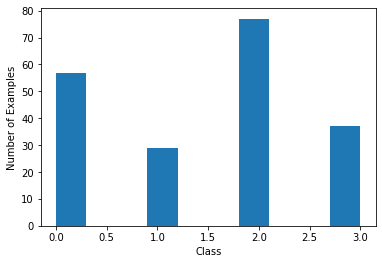

In [35]:
np.random.seed(30)
# On the Mac we tested this on, using this random seed produces a fairly even class balance
# Python is not always consistent across machines with preserving seeded random behavior, 
# so if your histogram shows major class imbalance, change this seed to get better balance

data = np.random.randn(num_dim, num_points)
true_model = {'weights': np.random.randn(num_dim, num_classes)}

labels = linear_predict(data, true_model)
plt.hist(labels)
plt.xlabel('Class')
plt.ylabel('Number of Examples')
plt.show()

In [36]:
# Create noisy labels
noise_index = np.random.rand(num_points) < 0.3
noisy_labels = labels.copy()
noisy_labels[noise_index] = np.random.randint(0, num_classes, np.count_nonzero(noise_index))

Text(0.5, 1.0, 'Noisy Data')

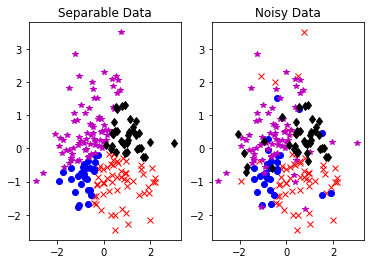

In [37]:
# Plot generated data
markers = ['xr', 'ob', '*m',  'dk']

plt.subplot(121)
for i in range(num_classes):
    plt.plot(data[0, labels == i], data[1, labels == i], markers[i])
plt.title('Separable Data')

plt.subplot(122)
for i in range(num_classes):
    plt.plot(data[0, noisy_labels == i], data[1, noisy_labels == i], markers[i])
plt.title('Noisy Data')

In [38]:
# split into training and testing sets

num_train = int(num_points / 2)
num_test = num_points - num_train

train_data = data[:, :num_train]
test_data = data[:, num_train + 1:]

# store noiseless and noisy labels in tuples

train_labels = (labels[:num_train], noisy_labels[:num_train])
test_labels = (labels[num_train + 1:], noisy_labels[num_train + 1:])

In [39]:
# Perceptron experiment

epochs = 20

train_accuracy = dict()
test_accuracy = dict()
model = dict()

for is_noisy in (False, True):
    model[is_noisy] = { 'weights': np.zeros((num_dim, num_classes)) }
    train_accuracy[is_noisy] = np.zeros(epochs)
    test_accuracy[is_noisy] = np.zeros(epochs)
 
    for epoch in range(epochs):
        # first measure training and testing accuracy            
        predictions = linear_predict(train_data, model[is_noisy])
        train_accuracy[is_noisy][epoch] = np.sum(predictions == train_labels[is_noisy]) / num_train

        predictions = linear_predict(test_data, model[is_noisy])
        test_accuracy[is_noisy][epoch] = np.sum(predictions == test_labels[is_noisy]) / num_test

        # run perceptron training
        mistakes = 0
        for i in range(num_train):
            correct = perceptron_update(train_data[:, i], model[is_noisy], train_labels[is_noisy][i])
            
            if not correct:
                mistakes += 1
        
        print("Finished epoch %d with %d mistakes." % (epoch, mistakes))

Finished epoch 0 with 22 mistakes.
Finished epoch 1 with 17 mistakes.
Finished epoch 2 with 4 mistakes.
Finished epoch 3 with 0 mistakes.
Finished epoch 4 with 0 mistakes.
Finished epoch 5 with 0 mistakes.
Finished epoch 6 with 0 mistakes.
Finished epoch 7 with 0 mistakes.
Finished epoch 8 with 0 mistakes.
Finished epoch 9 with 0 mistakes.
Finished epoch 10 with 0 mistakes.
Finished epoch 11 with 0 mistakes.
Finished epoch 12 with 0 mistakes.
Finished epoch 13 with 0 mistakes.
Finished epoch 14 with 0 mistakes.
Finished epoch 15 with 0 mistakes.
Finished epoch 16 with 0 mistakes.
Finished epoch 17 with 0 mistakes.
Finished epoch 18 with 0 mistakes.
Finished epoch 19 with 0 mistakes.
Finished epoch 0 with 42 mistakes.
Finished epoch 1 with 46 mistakes.
Finished epoch 2 with 47 mistakes.
Finished epoch 3 with 46 mistakes.
Finished epoch 4 with 41 mistakes.
Finished epoch 5 with 45 mistakes.
Finished epoch 6 with 44 mistakes.
Finished epoch 7 with 44 mistakes.
Finished epoch 8 with 45 mis

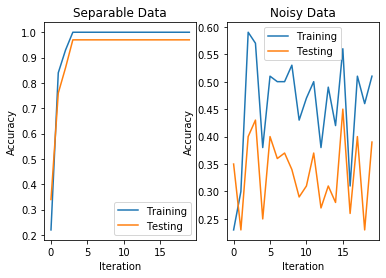

Red markers indicate incorrect predictions


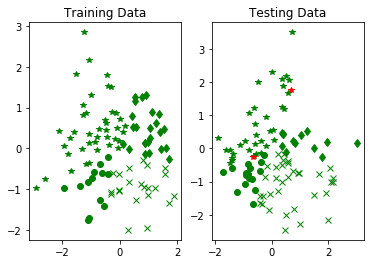

In [40]:
# Plot results of perceptron training

plt.subplot(121)
train_line = plt.plot(range(epochs), train_accuracy[False], label="Training")
test_line = plt.plot(range(epochs), test_accuracy[False], label="Testing")
plt.title('Separable Data')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(122)
train_line = plt.plot(range(epochs), train_accuracy[True], label="Training")
test_line = plt.plot(range(epochs), test_accuracy[True], label="Testing")
plt.title('Noisy Data')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# plot clean predictions

test_predictions = linear_predict(test_data, model[False])
train_predictions = linear_predict(train_data, model[False])

plt.subplot(121)
plot_predictions(train_data, train_labels[False], train_predictions)
plt.title('Training Data')
plt.subplot(122)
plot_predictions(test_data, test_labels[False], test_predictions)
plt.title('Testing Data')

print("Red markers indicate incorrect predictions")

In [41]:
# Logistic regression gradient check

# first check if the gradient and objective function are consistent with each other
_ = log_reg_train(train_data, train_labels[True], {'lambda': 0.1}, 
              {'weights': np.random.randn(num_dim * num_classes)}, check_gradient=True)

sum_logsumexp_w_x
 175.81301196005546
sum_wyi_xi
 -19.94889968487654 ()
nll, nll.shape
 195.86386967533403 ()
gradient_wc
 [[-38.40740216]
 [ 15.21040053]] (2, 1)
gradient_wc
 [[-0.43358792]
 [ 0.73550982]] (2, 1)
gradient_wc
 [[48.50807427]
 [-7.72536746]] (2, 1)
gradient_wc
 [[-9.70008132]
 [-8.04553988]] (2, 1)
sum_logsumexp_w_x
 175.81301196005546
sum_wyi_xi
 -19.94889968487654 ()
nll, nll.shape
 195.86386967533403 ()
gradient_wc
 [[-38.40740216]
 [ 15.21040053]] (2, 1)
gradient_wc
 [[-0.43358792]
 [ 0.73550982]] (2, 1)
gradient_wc
 [[48.50807427]
 [-7.72536746]] (2, 1)
gradient_wc
 [[-9.70008132]
 [-8.04553988]] (2, 1)
sum_logsumexp_w_x
 175.8130115321163
sum_wyi_xi
 -19.948899542328487 ()
nll, nll.shape
 195.86386910439867 ()
gradient_wc
 [[-38.40740194]
 [ 15.21040051]] (2, 1)
gradient_wc
 [[-0.43358805]
 [ 0.73550982]] (2, 1)
gradient_wc
 [[48.50807424]
 [-7.72536744]] (2, 1)
gradient_wc
 [[-9.70008137]
 [-8.04553987]] (2, 1)
sum_logsumexp_w_x
 175.81301187513236
sum_wyi_xi
 -1

In [43]:
# Train logistic regression

lambda_vals = 10 ** np.linspace(-9, 2, 12)

train_accuracy = dict()
test_accuracy = dict()
model = dict()

for is_noisy in (False, True):
    model[is_noisy] = {'weights': np.zeros((num_dim, num_classes))}
    
    train_accuracy[is_noisy] = np.zeros(lambda_vals.size)
    test_accuracy[is_noisy] = np.zeros(lambda_vals.size)
    
    for i in range(lambda_vals.size):
        print("for loop:", i)
        params = {'lambda': lambda_vals[i]}
        
        model[is_noisy] = log_reg_train(train_data, train_labels[is_noisy], params, model[is_noisy])
        
        train_predictions = linear_predict(train_data, model[is_noisy])
        train_accuracy[is_noisy][i] = np.sum(train_predictions == train_labels[is_noisy]) / num_train

        test_predictions = linear_predict(test_data, model[is_noisy])
        test_accuracy[is_noisy][i] = np.sum(test_predictions == test_labels[is_noisy]) / num_test

for loop: 0
sum_logsumexp_w_x
 138.62943611198907
sum_wyi_xi
 0.0 ()
nll, nll.shape
 138.62943611198907 ()
gradient_wc
 [[-17.74755399]
 [ 20.97110838]] (2, 1)
gradient_wc
 [[ 8.94897065]
 [11.83949507]] (2, 1)
gradient_wc
 [[ 34.49383948]
 [-21.84677968]] (2, 1)
gradient_wc
 [[-25.69525614]
 [-10.96382377]] (2, 1)
sum_logsumexp_w_x
 138.62943611198907
sum_wyi_xi
 0.0 ()
nll, nll.shape
 138.62943611198907 ()
gradient_wc
 [[-17.74755399]
 [ 20.97110838]] (2, 1)
gradient_wc
 [[ 8.94897065]
 [11.83949507]] (2, 1)
gradient_wc
 [[ 34.49383948]
 [-21.84677968]] (2, 1)
gradient_wc
 [[-25.69525614]
 [-10.96382377]] (2, 1)
sum_logsumexp_w_x
 151.5776177914782
sum_wyi_xi
 59.08784124710861 ()
nll, nll.shape
 92.48977654487459 ()
gradient_wc
 [[-9.21208824]
 [14.02774077]] (2, 1)
gradient_wc
 [[6.26025394]
 [7.90948236]] (2, 1)
gradient_wc
 [[ 17.89442906]
 [-13.34130389]] (2, 1)
gradient_wc
 [[-14.94259475]
 [ -8.59591925]] (2, 1)
sum_logsumexp_w_x
 151.5776177914782
sum_wyi_xi
 59.0878412471086

gradient_wc
 [[ 0.00112917]
 [-0.11601102]] (2, 1)
gradient_wc
 [[-0.13278913]
 [ 0.11668444]] (2, 1)
sum_logsumexp_w_x
 4160.384289741049
sum_wyi_xi
 4158.235336166431 ()
nll, nll.shape
 2.148953611033903 ()
gradient_wc
 [[-0.07159742]
 [-0.31367283]] (2, 1)
gradient_wc
 [[0.12913134]
 [0.31593195]] (2, 1)
gradient_wc
 [[ 0.02227902]
 [-0.00802274]] (2, 1)
gradient_wc
 [[-0.07981293]
 [ 0.00576361]] (2, 1)
sum_logsumexp_w_x
 4160.384289741049
sum_wyi_xi
 4158.235336166431 ()
nll, nll.shape
 2.148953611033903 ()
gradient_wc
 [[-0.07159742]
 [-0.31367283]] (2, 1)
gradient_wc
 [[0.12913134]
 [0.31593195]] (2, 1)
gradient_wc
 [[ 0.02227902]
 [-0.00802274]] (2, 1)
gradient_wc
 [[-0.07981293]
 [ 0.00576361]] (2, 1)
sum_logsumexp_w_x
 5283.523789040768
sum_wyi_xi
 5281.9276588314015 ()
nll, nll.shape
 1.5961302556443115 ()
gradient_wc
 [[-0.08423825]
 [-0.25751379]] (2, 1)
gradient_wc
 [[0.10595252]
 [0.25959925]] (2, 1)
gradient_wc
 [[0.04646902]
 [0.07742976]] (2, 1)
gradient_wc
 [[-0.0681

 [[-0.02758596]
 [-0.06427757]] (2, 1)
sum_logsumexp_w_x
 inf
sum_wyi_xi
 19460.309813813026 ()
nll, nll.shape
 inf ()
gradient_wc
 [[0.0692184 ]
 [0.19756907]] (2, 1)
gradient_wc
 [[-0.06925689]
 [-0.19756869]] (2, 1)
gradient_wc
 [[ 1.27085033]
 [-2.78058558]] (2, 1)
gradient_wc
 [[-0.02769766]
 [-0.06453764]] (2, 1)
sum_logsumexp_w_x
 19441.12212925278
sum_wyi_xi
 19440.605979124488 ()
nll, nll.shape
 0.516150298735738 ()
gradient_wc
 [[0.06920982]
 [0.19755252]] (2, 1)
gradient_wc
 [[-0.0692486 ]
 [-0.19755213]] (2, 1)
gradient_wc
 [[0.02779244]
 [0.06466766]] (2, 1)
gradient_wc
 [[-0.02775367]
 [-0.06466805]] (2, 1)
sum_logsumexp_w_x
 19441.12212925278
sum_wyi_xi
 19440.605979124488 ()
nll, nll.shape
 0.516150298735738 ()
gradient_wc
 [[0.06920982]
 [0.19755252]] (2, 1)
gradient_wc
 [[-0.0692486 ]
 [-0.19755213]] (2, 1)
gradient_wc
 [[0.02779244]
 [0.06466766]] (2, 1)
gradient_wc
 [[-0.02775367]
 [-0.06466805]] (2, 1)
sum_logsumexp_w_x
 19450.97385469271
sum_wyi_xi
 19450.45789646

 19151.418610222947
sum_wyi_xi
 19151.08497551287 ()
nll, nll.shape
 0.3336363863272709 ()
gradient_wc
 [[-0.00322278]
 [ 0.00122342]] (2, 1)
gradient_wc
 [[ 0.00318246]
 [-0.0012242 ]] (2, 1)
gradient_wc
 [[-0.00045357]
 [-0.0013674 ]] (2, 1)
gradient_wc
 [[0.00049389]
 [0.00136818]] (2, 1)
sum_logsumexp_w_x
 19158.77286036839
sum_wyi_xi
 19158.439864905133 ()
nll, nll.shape
 0.3329971399034548 ()
gradient_wc
 [[-0.00321005]
 [ 0.00122527]] (2, 1)
gradient_wc
 [[ 0.00316952]
 [-0.00122604]] (2, 1)
gradient_wc
 [[-0.00059077]
 [-0.00173483]] (2, 1)
gradient_wc
 [[0.0006313]
 [0.0017356]] (2, 1)
sum_logsumexp_w_x
 19158.77286036839
sum_wyi_xi
 19158.439864905133 ()
nll, nll.shape
 0.3329971399034548 ()
gradient_wc
 [[-0.00321005]
 [ 0.00122527]] (2, 1)
gradient_wc
 [[ 0.00316952]
 [-0.00122604]] (2, 1)
gradient_wc
 [[-0.00059077]
 [-0.00173483]] (2, 1)
gradient_wc
 [[0.0006313]
 [0.0017356]] (2, 1)
sum_logsumexp_w_x
 19170.980481078623
sum_wyi_xi
 19170.648635380785 ()
nll, nll.shape
 0

 [-0.00056046]] (2, 1)
gradient_wc
 [[ 0.00406349]
 [-0.00021767]] (2, 1)
gradient_wc
 [[-0.00168947]
 [ 0.00218474]] (2, 1)
sum_logsumexp_w_x
 19681.35372786148
sum_wyi_xi
 19681.104368338452 ()
nll, nll.shape
 0.24936124226587708 ()
gradient_wc
 [[-0.00059102]
 [-0.00186422]] (2, 1)
gradient_wc
 [[-0.00156073]
 [-0.00018207]] (2, 1)
gradient_wc
 [[ 0.00417055]
 [-0.00013238]] (2, 1)
gradient_wc
 [[-0.0020188 ]
 [ 0.00217867]] (2, 1)
sum_logsumexp_w_x
 19681.35372786148
sum_wyi_xi
 19681.104368338452 ()
nll, nll.shape
 0.24936124226587708 ()
gradient_wc
 [[-0.00059102]
 [-0.00186422]] (2, 1)
gradient_wc
 [[-0.00156073]
 [-0.00018207]] (2, 1)
gradient_wc
 [[ 0.00417055]
 [-0.00013238]] (2, 1)
gradient_wc
 [[-0.0020188 ]
 [ 0.00217867]] (2, 1)
sum_logsumexp_w_x
 19695.093971761537
sum_wyi_xi
 19694.845454092378 ()
nll, nll.shape
 0.24851938949359464 ()
gradient_wc
 [[-0.00035565]
 [-0.00254553]] (2, 1)
gradient_wc
 [[-0.00146935]
 [ 0.00038518]] (2, 1)
gradient_wc
 [[ 4.32316183e-03]
 [

 0.21689891340065515 ()
gradient_wc
 [[0.01110707]
 [0.00789208]] (2, 1)
gradient_wc
 [[-0.00816201]
 [-0.01181645]] (2, 1)
gradient_wc
 [[0.00684127]
 [0.00221723]] (2, 1)
gradient_wc
 [[-0.00978634]
 [ 0.00170714]] (2, 1)
sum_logsumexp_w_x
 20227.464821642916
sum_wyi_xi
 20227.247940363228 ()
nll, nll.shape
 0.21689891340065515 ()
gradient_wc
 [[0.01110707]
 [0.00789208]] (2, 1)
gradient_wc
 [[-0.00816201]
 [-0.01181645]] (2, 1)
gradient_wc
 [[0.00684127]
 [0.00221723]] (2, 1)
gradient_wc
 [[-0.00978634]
 [ 0.00170714]] (2, 1)
sum_logsumexp_w_x
 20228.7442388878
sum_wyi_xi
 20228.528274981945 ()
nll, nll.shape
 0.21598154003731906 ()
gradient_wc
 [[0.01224464]
 [0.01389957]] (2, 1)
gradient_wc
 [[-0.00990172]
 [-0.01750595]] (2, 1)
gradient_wc
 [[0.00638697]
 [0.002028  ]] (2, 1)
gradient_wc
 [[-0.00872989]
 [ 0.00157838]] (2, 1)
sum_logsumexp_w_x
 20228.7442388878
sum_wyi_xi
 20228.528274981945 ()
nll, nll.shape
 0.21598154003731906 ()
gradient_wc
 [[0.01224464]
 [0.01389957]] (2, 1

 [[0.0065798]
 [0.0224766]] (2, 1)
gradient_wc
 [[-0.00664333]
 [-0.02269324]] (2, 1)
gradient_wc
 [[ 0.00022964]
 [-0.00052024]] (2, 1)
gradient_wc
 [[-0.00016611]
 [ 0.00073688]] (2, 1)
sum_logsumexp_w_x
 inf
sum_wyi_xi
 20406.253245549557 ()
nll, nll.shape
 inf ()
gradient_wc
 [[0.00838117]
 [0.0274453 ]] (2, 1)
gradient_wc
 [[-0.00836394]
 [-0.02759913]] (2, 1)
gradient_wc
 [[ 1.24323653]
 [-2.84557617]] (2, 1)
gradient_wc
 [[-0.00013957]
 [ 0.00060716]] (2, 1)
sum_logsumexp_w_x
 inf
sum_wyi_xi
 20406.253245549557 ()
nll, nll.shape
 inf ()
gradient_wc
 [[0.00838117]
 [0.0274453 ]] (2, 1)
gradient_wc
 [[-0.00836394]
 [-0.02759913]] (2, 1)
gradient_wc
 [[ 1.24323653]
 [-2.84557617]] (2, 1)
gradient_wc
 [[-0.00013957]
 [ 0.00060716]] (2, 1)
sum_logsumexp_w_x
 20352.029072172638
sum_wyi_xi
 20351.827373601034 ()
nll, nll.shape
 0.2017162914853543 ()
gradient_wc
 [[0.0065798]
 [0.0224766]] (2, 1)
gradient_wc
 [[-0.00664333]
 [-0.02269324]] (2, 1)
gradient_wc
 [[ 0.00022964]
 [-0.0005202

 [-0.01416135]] (2, 1)
gradient_wc
 [[ 3.69588452e-04]
 [-8.65885212e-05]] (2, 1)
gradient_wc
 [[-0.00034668]
 [ 0.00061379]] (2, 1)
sum_logsumexp_w_x
 inf
sum_wyi_xi
 20376.553696224077 ()
nll, nll.shape
 inf ()
gradient_wc
 [[0.0052322 ]
 [0.01701674]] (2, 1)
gradient_wc
 [[-0.00525367]
 [-0.01766473]] (2, 1)
gradient_wc
 [[ 1.24378205]
 [-2.84498061]] (2, 1)
gradient_wc
 [[-0.0006464 ]
 [ 0.00050575]] (2, 1)
sum_logsumexp_w_x
 inf
sum_wyi_xi
 20371.414015829123 ()
nll, nll.shape
 inf ()
gradient_wc
 [[0.00445983]
 [0.01534197]] (2, 1)
gradient_wc
 [[-0.00448146]
 [-0.01592453]] (2, 1)
gradient_wc
 [[ 1.24362224]
 [-2.84509947]] (2, 1)
gradient_wc
 [[-0.00048644]
 [ 0.00055919]] (2, 1)
sum_logsumexp_w_x
 inf
sum_wyi_xi
 20368.84417563163 ()
nll, nll.shape
 inf ()
gradient_wc
 [[0.00407674]
 [0.0144922 ]] (2, 1)
gradient_wc
 [[-0.00409889]
 [-0.01504592]] (2, 1)
gradient_wc
 [[ 1.24355058]
 [-2.84515543]] (2, 1)
gradient_wc
 [[-0.00041425]
 [ 0.00058631]] (2, 1)
sum_logsumexp_w_x
 203

 [[-0.00019227]
 [-0.00360558]] (2, 1)
gradient_wc
 [[-0.00116339]
 [ 0.0014929 ]] (2, 1)
gradient_wc
 [[0.00092224]
 [0.0010412 ]] (2, 1)
sum_logsumexp_w_x
 20360.814887017943
sum_wyi_xi
 20360.617062643494 ()
nll, nll.shape
 0.19959737866156502 ()
gradient_wc
 [[0.00076359]
 [0.00192889]] (2, 1)
gradient_wc
 [[-0.00052203]
 [-0.00446678]] (2, 1)
gradient_wc
 [[-0.00115388]
 [ 0.00149836]] (2, 1)
gradient_wc
 [[0.00091232]
 [0.00103953]] (2, 1)
sum_logsumexp_w_x
 20360.814887017943
sum_wyi_xi
 20360.617062643494 ()
nll, nll.shape
 0.19959737866156502 ()
gradient_wc
 [[0.00076359]
 [0.00192889]] (2, 1)
gradient_wc
 [[-0.00052203]
 [-0.00446678]] (2, 1)
gradient_wc
 [[-0.00115388]
 [ 0.00149836]] (2, 1)
gradient_wc
 [[0.00091232]
 [0.00103953]] (2, 1)
sum_logsumexp_w_x
 20362.321918937265
sum_wyi_xi
 20362.124095332012 ()
nll, nll.shape
 0.19959673869379913 ()
gradient_wc
 [[0.0005044 ]
 [0.00125584]] (2, 1)
gradient_wc
 [[-0.00026317]
 [-0.00379075]] (2, 1)
gradient_wc
 [[-0.00116136]


 [-0.00505648]] (2, 1)
gradient_wc
 [[-0.00114728]
 [ 0.00150213]] (2, 1)
gradient_wc
 [[0.00090544]
 [0.00103838]] (2, 1)
sum_logsumexp_w_x
 20360.486906498147
sum_wyi_xi
 20360.28908151416 ()
nll, nll.shape
 0.199597960076062 ()
gradient_wc
 [[0.00081988]
 [0.00207503]] (2, 1)
gradient_wc
 [[-0.00057825]
 [-0.00461357]] (2, 1)
gradient_wc
 [[-0.00115225]
 [ 0.00149929]] (2, 1)
gradient_wc
 [[0.00091062]
 [0.00103924]] (2, 1)
sum_logsumexp_w_x
 20361.03034265341
sum_wyi_xi
 20360.83251859344 ()
nll, nll.shape
 0.19959708265741938 ()
gradient_wc
 [[0.00072659]
 [0.00183283]] (2, 1)
gradient_wc
 [[-0.00048508]
 [-0.00437028]] (2, 1)
gradient_wc
 [[-0.00115495]
 [ 0.00149774]] (2, 1)
gradient_wc
 [[0.00091344]
 [0.00103972]] (2, 1)
sum_logsumexp_w_x
 20361.24957633887
sum_wyi_xi
 20361.051752528925 ()
nll, nll.shape
 0.19959685143112438 ()
gradient_wc
 [[0.00068893]
 [0.00173502]] (2, 1)
gradient_wc
 [[-0.00044746]
 [-0.00427204]] (2, 1)
gradient_wc
 [[-0.00115604]
 [ 0.00149712]] (2, 1)

 0.21555716596049024 ()
gradient_wc
 [[ 0.00965497]
 [-0.01222326]] (2, 1)
gradient_wc
 [[-0.00690806]
 [-0.01037075]] (2, 1)
gradient_wc
 [[-0.01649725]
 [ 0.01723968]] (2, 1)
gradient_wc
 [[0.01375034]
 [0.00535432]] (2, 1)
sum_logsumexp_w_x
 20363.333350001885
sum_wyi_xi
 20363.135525037673 ()
nll, nll.shape
 0.21555716596049024 ()
gradient_wc
 [[ 0.00965497]
 [-0.01222326]] (2, 1)
gradient_wc
 [[-0.00690806]
 [-0.01037075]] (2, 1)
gradient_wc
 [[-0.01649725]
 [ 0.01723968]] (2, 1)
gradient_wc
 [[0.01375034]
 [0.00535432]] (2, 1)
sum_logsumexp_w_x
 20363.3333500019
sum_wyi_xi
 20363.135525037695 ()
nll, nll.shape
 0.21555716595321428 ()
gradient_wc
 [[ 0.00965497]
 [-0.01222326]] (2, 1)
gradient_wc
 [[-0.00690806]
 [-0.01037075]] (2, 1)
gradient_wc
 [[-0.01649725]
 [ 0.01723968]] (2, 1)
gradient_wc
 [[0.01375034]
 [0.00535432]] (2, 1)
sum_logsumexp_w_x
 20363.3333500019
sum_wyi_xi
 20363.135525037695 ()
nll, nll.shape
 0.21555716595321428 ()
gradient_wc
 [[ 0.00965497]
 [-0.01222326

 0.21555716595321428 ()
gradient_wc
 [[ 0.00965497]
 [-0.01222326]] (2, 1)
gradient_wc
 [[-0.00690806]
 [-0.01037075]] (2, 1)
gradient_wc
 [[-0.01649725]
 [ 0.01723968]] (2, 1)
gradient_wc
 [[0.01375034]
 [0.00535432]] (2, 1)
sum_logsumexp_w_x
 20363.333350001893
sum_wyi_xi
 20363.135525037687 ()
nll, nll.shape
 0.21555716595321428 ()
gradient_wc
 [[ 0.00965497]
 [-0.01222326]] (2, 1)
gradient_wc
 [[-0.00690806]
 [-0.01037075]] (2, 1)
gradient_wc
 [[-0.01649725]
 [ 0.01723968]] (2, 1)
gradient_wc
 [[0.01375034]
 [0.00535432]] (2, 1)
sum_logsumexp_w_x
 20363.333350001893
sum_wyi_xi
 20363.135525037687 ()
nll, nll.shape
 0.21555716595321428 ()
gradient_wc
 [[ 0.00965497]
 [-0.01222326]] (2, 1)
gradient_wc
 [[-0.00690806]
 [-0.01037075]] (2, 1)
gradient_wc
 [[-0.01649725]
 [ 0.01723968]] (2, 1)
gradient_wc
 [[0.01375034]
 [0.00535432]] (2, 1)
sum_logsumexp_w_x
 20363.333350001893
sum_wyi_xi
 20363.135525037687 ()
nll, nll.shape
 0.21555716595321428 ()
gradient_wc
 [[ 0.00965497]
 [-0.0122

nll, nll.shape
 0.21555716595321428 ()
gradient_wc
 [[ 0.00965497]
 [-0.01222326]] (2, 1)
gradient_wc
 [[-0.00690806]
 [-0.01037075]] (2, 1)
gradient_wc
 [[-0.01649725]
 [ 0.01723968]] (2, 1)
gradient_wc
 [[0.01375034]
 [0.00535432]] (2, 1)
sum_logsumexp_w_x
 20363.333350001893
sum_wyi_xi
 20363.135525037687 ()
nll, nll.shape
 0.21555716595321428 ()
gradient_wc
 [[ 0.00965497]
 [-0.01222326]] (2, 1)
gradient_wc
 [[-0.00690806]
 [-0.01037075]] (2, 1)
gradient_wc
 [[-0.01649725]
 [ 0.01723968]] (2, 1)
gradient_wc
 [[0.01375034]
 [0.00535432]] (2, 1)
sum_logsumexp_w_x
 20363.333350001893
sum_wyi_xi
 20363.135525037687 ()
nll, nll.shape
 0.21555716595321428 ()
gradient_wc
 [[ 0.00965497]
 [-0.01222326]] (2, 1)
gradient_wc
 [[-0.00690806]
 [-0.01037075]] (2, 1)
gradient_wc
 [[-0.01649725]
 [ 0.01723968]] (2, 1)
gradient_wc
 [[0.01375034]
 [0.00535432]] (2, 1)
sum_logsumexp_w_x
 20363.333350001893
sum_wyi_xi
 20363.135525037684 ()
nll, nll.shape
 0.21555716595685226 ()
gradient_wc
 [[ 0.0096

gradient_wc
 [[0.14200059]
 [0.04848028]] (2, 1)
sum_logsumexp_w_x
 20363.333349992317
sum_wyi_xi
 20363.135525028112 ()
nll, nll.shape
 0.37514698168524774 ()
gradient_wc
 [[ 0.10290534]
 [-0.14248258]] (2, 1)
gradient_wc
 [[-0.07509947]
 [-0.08072212]] (2, 1)
gradient_wc
 [[-0.16980646]
 [ 0.17472442]] (2, 1)
gradient_wc
 [[0.14200059]
 [0.04848028]] (2, 1)
sum_logsumexp_w_x
 20363.333349992317
sum_wyi_xi
 20363.135525028112 ()
nll, nll.shape
 0.37514698168524774 ()
gradient_wc
 [[ 0.10290534]
 [-0.14248258]] (2, 1)
gradient_wc
 [[-0.07509947]
 [-0.08072212]] (2, 1)
gradient_wc
 [[-0.16980646]
 [ 0.17472442]] (2, 1)
gradient_wc
 [[0.14200059]
 [0.04848028]] (2, 1)
sum_logsumexp_w_x
 20363.333349992317
sum_wyi_xi
 20363.135525028112 ()
nll, nll.shape
 0.37514698168524774 ()
gradient_wc
 [[ 0.10290534]
 [-0.14248258]] (2, 1)
gradient_wc
 [[-0.07509947]
 [-0.08072212]] (2, 1)
gradient_wc
 [[-0.16980646]
 [ 0.17472442]] (2, 1)
gradient_wc
 [[0.14200059]
 [0.04848028]] (2, 1)
sum_logsumex

 [0.04848028]] (2, 1)
sum_logsumexp_w_x
 20363.333349992314
sum_wyi_xi
 20363.135525028105 ()
nll, nll.shape
 0.3751469816888857 ()
gradient_wc
 [[ 0.10290534]
 [-0.14248258]] (2, 1)
gradient_wc
 [[-0.07509947]
 [-0.08072212]] (2, 1)
gradient_wc
 [[-0.16980646]
 [ 0.17472442]] (2, 1)
gradient_wc
 [[0.14200059]
 [0.04848028]] (2, 1)
sum_logsumexp_w_x
 20363.333349992314
sum_wyi_xi
 20363.135525028105 ()
nll, nll.shape
 0.3751469816888857 ()
gradient_wc
 [[ 0.10290534]
 [-0.14248258]] (2, 1)
gradient_wc
 [[-0.07509947]
 [-0.08072212]] (2, 1)
gradient_wc
 [[-0.16980646]
 [ 0.17472442]] (2, 1)
gradient_wc
 [[0.14200059]
 [0.04848028]] (2, 1)
sum_logsumexp_w_x
 20363.333349992317
sum_wyi_xi
 20363.135525028112 ()
nll, nll.shape
 0.37514698168524774 ()
gradient_wc
 [[ 0.10290534]
 [-0.14248258]] (2, 1)
gradient_wc
 [[-0.07509947]
 [-0.08072212]] (2, 1)
gradient_wc
 [[-0.16980646]
 [ 0.17472442]] (2, 1)
gradient_wc
 [[0.14200059]
 [0.04848028]] (2, 1)
sum_logsumexp_w_x
 20363.333349992317
sum

 [[-0.69738511]
 [ 0.76919162]] (2, 1)
gradient_wc
 [[0.57755354]
 [0.22104505]] (2, 1)
sum_logsumexp_w_x
 10280.677686183748
sum_wyi_xi
 10280.002968730556 ()
nll, nll.shape
 1.5698997494819196 ()
gradient_wc
 [[ 0.50678285]
 [-0.83221649]] (2, 1)
gradient_wc
 [[-0.36733046]
 [-0.30465049]] (2, 1)
gradient_wc
 [[-0.83457178]
 [ 0.88572888]] (2, 1)
gradient_wc
 [[0.69511939]
 [0.2511381 ]] (2, 1)
sum_logsumexp_w_x
 10280.677686183748
sum_wyi_xi
 10280.002968730556 ()
nll, nll.shape
 1.5698997494819196 ()
gradient_wc
 [[ 0.50678285]
 [-0.83221649]] (2, 1)
gradient_wc
 [[-0.36733046]
 [-0.30465049]] (2, 1)
gradient_wc
 [[-0.83457178]
 [ 0.88572888]] (2, 1)
gradient_wc
 [[0.69511939]
 [0.2511381 ]] (2, 1)
sum_logsumexp_w_x
 10606.046682946164
sum_wyi_xi
 10605.402671149814 ()
nll, nll.shape
 1.5675318972462264 ()
gradient_wc
 [[ 0.52034635]
 [-0.8555438 ]] (2, 1)
gradient_wc
 [[-0.37633592]
 [-0.31558794]] (2, 1)
gradient_wc
 [[-0.8648222 ]
 [ 0.91300903]] (2, 1)
gradient_wc
 [[0.72081177

gradient_wc
 [[-0.865774  ]
 [ 0.91387511]] (2, 1)
gradient_wc
 [[0.72161918]
 [0.25834442]] (2, 1)
sum_logsumexp_w_x
 10748.368676195147
sum_wyi_xi
 10747.737402116249 ()
nll, nll.shape
 1.5671895637788111 ()
gradient_wc
 [[ 0.52639322]
 [-0.86574967]] (2, 1)
gradient_wc
 [[-0.38038843]
 [-0.32042078]] (2, 1)
gradient_wc
 [[-0.8779371 ]
 [ 0.92498254]] (2, 1)
gradient_wc
 [[0.73193231]
 [0.26118791]] (2, 1)
sum_logsumexp_w_x
 10802.847298381947
sum_wyi_xi
 10802.220794613693 ()
nll, nll.shape
 1.5671640023410873 ()
gradient_wc
 [[ 0.528725  ]
 [-0.86965651]] (2, 1)
gradient_wc
 [[-0.38195682]
 [-0.32227816]] (2, 1)
gradient_wc
 [[-0.88293967]
 [ 0.92957179]] (2, 1)
gradient_wc
 [[0.73617149]
 [0.26236288]] (2, 1)
sum_logsumexp_w_x
 10802.847298381947
sum_wyi_xi
 10802.220794613693 ()
nll, nll.shape
 1.5671640023410873 ()
gradient_wc
 [[ 0.528725  ]
 [-0.86965651]] (2, 1)
gradient_wc
 [[-0.38195682]
 [-0.32227816]] (2, 1)
gradient_wc
 [[-0.88293967]
 [ 0.92957179]] (2, 1)
gradient_wc
 

 [ 2.76673741]] (2, 1)
gradient_wc
 [[2.13233635]
 [0.77923384]] (2, 1)
sum_logsumexp_w_x
 3232.1471028585383
sum_wyi_xi
 3229.224512527841 ()
nll, nll.shape
 5.729878485818517 ()
gradient_wc
 [[ 1.7287343 ]
 [-2.28123453]] (2, 1)
gradient_wc
 [[-1.30013099]
 [-1.26473672]] (2, 1)
gradient_wc
 [[-2.56093966]
 [ 2.76673741]] (2, 1)
gradient_wc
 [[2.13233635]
 [0.77923384]] (2, 1)
sum_logsumexp_w_x
 3232.1570583426233
sum_wyi_xi
 3229.2344782582213 ()
nll, nll.shape
 5.729876932559819 ()
gradient_wc
 [[ 1.72874036]
 [-2.28124214]] (2, 1)
gradient_wc
 [[-1.30013514]
 [-1.26474066]] (2, 1)
gradient_wc
 [[-2.56094782]
 [ 2.76674625]] (2, 1)
gradient_wc
 [[2.1323426 ]
 [0.77923655]] (2, 1)
sum_logsumexp_w_x
 3232.1570583426233
sum_wyi_xi
 3229.2344782582213 ()
nll, nll.shape
 5.729876932559819 ()
gradient_wc
 [[ 1.72874036]
 [-2.28124214]] (2, 1)
gradient_wc
 [[-1.30013514]
 [-1.26474066]] (2, 1)
gradient_wc
 [[-2.56094782]
 [ 2.76674625]] (2, 1)
gradient_wc
 [[2.1323426 ]
 [0.77923655]] (2,

 5.729876517531466 ()
gradient_wc
 [[ 1.72874198]
 [-2.28124417]] (2, 1)
gradient_wc
 [[-1.30013625]
 [-1.26474171]] (2, 1)
gradient_wc
 [[-2.56095001]
 [ 2.76674861]] (2, 1)
gradient_wc
 [[2.13234428]
 [0.77923727]] (2, 1)
sum_logsumexp_w_x
 3232.1597185043197
sum_wyi_xi
 3229.2371411577756 ()
nll, nll.shape
 5.729876517530556 ()
gradient_wc
 [[ 1.72874198]
 [-2.28124417]] (2, 1)
gradient_wc
 [[-1.30013625]
 [-1.26474171]] (2, 1)
gradient_wc
 [[-2.56095001]
 [ 2.76674861]] (2, 1)
gradient_wc
 [[2.13234428]
 [0.77923727]] (2, 1)
sum_logsumexp_w_x
 3232.1597185043197
sum_wyi_xi
 3229.2371411577756 ()
nll, nll.shape
 5.729876517530556 ()
gradient_wc
 [[ 1.72874198]
 [-2.28124417]] (2, 1)
gradient_wc
 [[-1.30013625]
 [-1.26474171]] (2, 1)
gradient_wc
 [[-2.56095001]
 [ 2.76674861]] (2, 1)
gradient_wc
 [[2.13234428]
 [0.77923727]] (2, 1)
sum_logsumexp_w_x
 3232.1597185043197
sum_wyi_xi
 3229.2371411577756 ()
nll, nll.shape
 5.729876517530556 ()
gradient_wc
 [[ 1.72874198]
 [-2.28124417]] (

 [[ 1.72874069]
 [-2.28124255]] (2, 1)
gradient_wc
 [[-1.30013536]
 [-1.26474088]] (2, 1)
gradient_wc
 [[-2.56094827]
 [ 2.76674673]] (2, 1)
gradient_wc
 [[2.13234294]
 [0.7792367 ]] (2, 1)
sum_logsumexp_w_x
 3232.15880045702
sum_wyi_xi
 3229.2362221656126 ()
nll, nll.shape
 5.729876660763239 ()
gradient_wc
 [[ 1.72874142]
 [-2.28124347]] (2, 1)
gradient_wc
 [[-1.30013586]
 [-1.26474135]] (2, 1)
gradient_wc
 [[-2.56094925]
 [ 2.7667478 ]] (2, 1)
gradient_wc
 [[2.1323437 ]
 [0.77923702]] (2, 1)
sum_logsumexp_w_x
 3232.159320556774
sum_wyi_xi
 3229.2367428006582 ()
nll, nll.shape
 5.7298765796181215 ()
gradient_wc
 [[ 1.72874174]
 [-2.28124387]] (2, 1)
gradient_wc
 [[-1.30013608]
 [-1.26474156]] (2, 1)
gradient_wc
 [[-2.56094968]
 [ 2.76674826]] (2, 1)
gradient_wc
 [[2.13234403]
 [0.77923716]] (2, 1)
sum_logsumexp_w_x
 3232.159546005161
sum_wyi_xi
 3229.236968481077 ()
nll, nll.shape
 5.729876544445688 ()
gradient_wc
 [[ 1.72874187]
 [-2.28124404]] (2, 1)
gradient_wc
 [[-1.30013617]
 [-1

 [-3.71196071]] (2, 1)
gradient_wc
 [[-8.90407728]
 [ 8.72128701]] (2, 1)
gradient_wc
 [[7.354742  ]
 [2.27240362]] (2, 1)
sum_logsumexp_w_x
 1070.9523489944704
sum_wyi_xi
 1060.9060988014094 ()
nll, nll.shape
 19.238670544206116 ()
gradient_wc
 [[ 5.00065839]
 [-7.28172991]] (2, 1)
gradient_wc
 [[-3.45132311]
 [-3.71196071]] (2, 1)
gradient_wc
 [[-8.90407728]
 [ 8.72128701]] (2, 1)
gradient_wc
 [[7.354742  ]
 [2.27240362]] (2, 1)
sum_logsumexp_w_x
 1070.9523511311968
sum_wyi_xi
 1060.9061009567486 ()
nll, nll.shape
 19.238670543994203 ()
gradient_wc
 [[ 5.00065838]
 [-7.28172994]] (2, 1)
gradient_wc
 [[-3.45132309]
 [-3.71196069]] (2, 1)
gradient_wc
 [[-8.90407732]
 [ 8.72128701]] (2, 1)
gradient_wc
 [[7.35474202]
 [2.27240362]] (2, 1)
sum_logsumexp_w_x
 1070.9523511311968
sum_wyi_xi
 1060.9061009567486 ()
nll, nll.shape
 19.238670543994203 ()
gradient_wc
 [[ 5.00065838]
 [-7.28172994]] (2, 1)
gradient_wc
 [[-3.45132309]
 [-3.71196069]] (2, 1)
gradient_wc
 [[-8.90407732]
 [ 8.72128701

 [[-25.67586477]
 [-28.33044726]] (2, 1)
gradient_wc
 [[-66.00249007]
 [ 63.29647315]] (2, 1)
gradient_wc
 [[54.76766209]
 [18.33328813]] (2, 1)
sum_logsumexp_w_x
 780.4237119262164
sum_wyi_xi
 766.6068260588477 ()
nll, nll.shape
 80.20315226407308 ()
gradient_wc
 [[ 36.91069275]
 [-53.29931402]] (2, 1)
gradient_wc
 [[-25.67586477]
 [-28.33044726]] (2, 1)
gradient_wc
 [[-66.00249007]
 [ 63.29647315]] (2, 1)
gradient_wc
 [[54.76766209]
 [18.33328813]] (2, 1)
sum_logsumexp_w_x
 708.1614327781808
sum_wyi_xi
 692.9903601758182 ()
nll, nll.shape
 75.09259824791673 ()
gradient_wc
 [[ 32.79232657]
 [-48.0634929 ]] (2, 1)
gradient_wc
 [[-22.7585043 ]
 [-25.38901434]] (2, 1)
gradient_wc
 [[-60.03457576]
 [ 55.80067338]] (2, 1)
gradient_wc
 [[50.00075349]
 [17.65183386]] (2, 1)
sum_logsumexp_w_x
 708.1614327781808
sum_wyi_xi
 692.9903601758182 ()
nll, nll.shape
 75.09259824791673 ()
gradient_wc
 [[ 32.79232657]
 [-48.0634929 ]] (2, 1)
gradient_wc
 [[-22.7585043 ]
 [-25.38901434]] (2, 1)
gradient

 [ 6.95844585]] (2, 1)
sum_logsumexp_w_x
 321.40189101213514
sum_wyi_xi
 286.66759408821724 ()
nll, nll.shape
 59.478071948972854 ()
gradient_wc
 [[ 17.59244856]
 [-19.24373808]] (2, 1)
gradient_wc
 [[-6.00868984]
 [-7.54960814]] (2, 1)
gradient_wc
 [[-24.256817  ]
 [ 19.83490037]] (2, 1)
gradient_wc
 [[12.67305828]
 [ 6.95844585]] (2, 1)
sum_logsumexp_w_x
 321.40190354223256
sum_wyi_xi
 286.6676078249606 ()
nll, nll.shape
 59.47807193378384 ()
gradient_wc
 [[ 17.59244974]
 [-19.24373933]] (2, 1)
gradient_wc
 [[-6.00869024]
 [-7.54960858]] (2, 1)
gradient_wc
 [[-24.25681859]
 [ 19.83490163]] (2, 1)
gradient_wc
 [[12.6730591 ]
 [ 6.95844627]] (2, 1)
sum_logsumexp_w_x
 321.40190354223256
sum_wyi_xi
 286.6676078249606 ()
nll, nll.shape
 59.47807193378384 ()
gradient_wc
 [[ 17.59244974]
 [-19.24373933]] (2, 1)
gradient_wc
 [[-6.00869024]
 [-7.54960858]] (2, 1)
gradient_wc
 [[-24.25681859]
 [ 19.83490163]] (2, 1)
gradient_wc
 [[12.6730591 ]
 [ 6.95844627]] (2, 1)
sum_logsumexp_w_x
 321.4019

 59.47807192972425 ()
gradient_wc
 [[ 17.59245005]
 [-19.24373966]] (2, 1)
gradient_wc
 [[-6.00869035]
 [-7.5496087 ]] (2, 1)
gradient_wc
 [[-24.25681902]
 [ 19.83490197]] (2, 1)
gradient_wc
 [[12.67305932]
 [ 6.95844639]] (2, 1)
sum_logsumexp_w_x
 321.40190689134016
sum_wyi_xi
 286.66761149658646 ()
nll, nll.shape
 59.47807192972425 ()
gradient_wc
 [[ 17.59245005]
 [-19.24373966]] (2, 1)
gradient_wc
 [[-6.00869035]
 [-7.5496087 ]] (2, 1)
gradient_wc
 [[-24.25681902]
 [ 19.83490197]] (2, 1)
gradient_wc
 [[12.67305932]
 [ 6.95844639]] (2, 1)
sum_logsumexp_w_x
 321.40190689134016
sum_wyi_xi
 286.6676114965866 ()
nll, nll.shape
 59.47807192972414 ()
gradient_wc
 [[ 17.59245005]
 [-19.24373966]] (2, 1)
gradient_wc
 [[-6.00869035]
 [-7.5496087 ]] (2, 1)
gradient_wc
 [[-24.25681902]
 [ 19.83490197]] (2, 1)
gradient_wc
 [[12.67305932]
 [ 6.95844639]] (2, 1)
sum_logsumexp_w_x
 321.40190689134016
sum_wyi_xi
 286.6676114965866 ()
nll, nll.shape
 59.47807192972414 ()
gradient_wc
 [[ 17.59245005]


 59.47807192972414 ()
gradient_wc
 [[ 17.59245005]
 [-19.24373966]] (2, 1)
gradient_wc
 [[-6.00869035]
 [-7.5496087 ]] (2, 1)
gradient_wc
 [[-24.25681902]
 [ 19.83490197]] (2, 1)
gradient_wc
 [[12.67305932]
 [ 6.95844639]] (2, 1)
sum_logsumexp_w_x
 321.40190689134016
sum_wyi_xi
 286.6676114965866 ()
nll, nll.shape
 59.47807192972414 ()
gradient_wc
 [[ 17.59245005]
 [-19.24373966]] (2, 1)
gradient_wc
 [[-6.00869035]
 [-7.5496087 ]] (2, 1)
gradient_wc
 [[-24.25681902]
 [ 19.83490197]] (2, 1)
gradient_wc
 [[12.67305932]
 [ 6.95844639]] (2, 1)
sum_logsumexp_w_x
 321.40190689134016
sum_wyi_xi
 286.6676114965866 ()
nll, nll.shape
 59.47807192972414 ()
gradient_wc
 [[ 17.59245005]
 [-19.24373966]] (2, 1)
gradient_wc
 [[-6.00869035]
 [-7.5496087 ]] (2, 1)
gradient_wc
 [[-24.25681902]
 [ 19.83490197]] (2, 1)
gradient_wc
 [[12.67305932]
 [ 6.95844639]] (2, 1)
sum_logsumexp_w_x
 321.40190689134016
sum_wyi_xi
 286.6676114965866 ()
nll, nll.shape
 59.47807192972414 ()
gradient_wc
 [[ 17.59245005]
 

 [[97.79536152]
 [20.98606405]] (2, 1)
sum_logsumexp_w_x
 208.39433135220955
sum_wyi_xi
 151.093999101863 ()
nll, nll.shape
 189.3642113936155 ()
gradient_wc
 [[ 82.24737763]
 [-98.35532045]] (2, 1)
gradient_wc
 [[-54.83556349]
 [-52.80209788]] (2, 1)
gradient_wc
 [[-119.07770933]
 [ 131.51558411]] (2, 1)
gradient_wc
 [[91.66589519]
 [19.64183422]] (2, 1)
sum_logsumexp_w_x
 208.39433135220955
sum_wyi_xi
 151.093999101863 ()
nll, nll.shape
 189.3642113936155 ()
gradient_wc
 [[ 82.24737763]
 [-98.35532045]] (2, 1)
gradient_wc
 [[-54.83556349]
 [-52.80209788]] (2, 1)
gradient_wc
 [[-119.07770933]
 [ 131.51558411]] (2, 1)
gradient_wc
 [[91.66589519]
 [19.64183422]] (2, 1)
sum_logsumexp_w_x
 190.09759245548423
sum_wyi_xi
 124.94632921487823 ()
nll, nll.shape
 175.03112549046875 ()
gradient_wc
 [[ 78.16868752]
 [-84.73961974]] (2, 1)
gradient_wc
 [[-52.52938694]
 [-33.14154686]] (2, 1)
gradient_wc
 [[-92.52261699]
 [103.63629367]] (2, 1)
gradient_wc
 [[66.88331641]
 [14.24487294]] (2, 1)
sum

 [ 0.03749365]] (2, 1)
gradient_wc
 [[0.03175329]
 [0.03482478]] (2, 1)
gradient_wc
 [[ 0.07962365]
 [-0.04570154]] (2, 1)
gradient_wc
 [[-0.07459521]
 [-0.01854154]] (2, 1)
sum_logsumexp_w_x
 141.43600638309658
sum_wyi_xi
 27.10159123547994 ()
nll, nll.shape
 137.5091321922158 ()
gradient_wc
 [[-0.06098618]
 [ 0.03749365]] (2, 1)
gradient_wc
 [[0.03175329]
 [0.03482478]] (2, 1)
gradient_wc
 [[ 0.07962365]
 [-0.04570154]] (2, 1)
gradient_wc
 [[-0.07459521]
 [-0.01854154]] (2, 1)
sum_logsumexp_w_x
 141.43600638309658
sum_wyi_xi
 27.10159123547994 ()
nll, nll.shape
 137.50913219221576 ()
gradient_wc
 [[-0.06098618]
 [ 0.03749365]] (2, 1)
gradient_wc
 [[0.03175329]
 [0.03482478]] (2, 1)
gradient_wc
 [[ 0.07962365]
 [-0.04570154]] (2, 1)
gradient_wc
 [[-0.07459521]
 [-0.01854154]] (2, 1)
sum_logsumexp_w_x
 141.43600638309658
sum_wyi_xi
 27.10159123547994 ()
nll, nll.shape
 137.50913219221576 ()
gradient_wc
 [[-0.06098618]
 [ 0.03749365]] (2, 1)
gradient_wc
 [[0.03175329]
 [0.03482478]] (2,

gradient_wc
 [[-0.06098618]
 [ 0.03749365]] (2, 1)
gradient_wc
 [[0.03175329]
 [0.03482478]] (2, 1)
gradient_wc
 [[ 0.07962365]
 [-0.04570154]] (2, 1)
gradient_wc
 [[-0.07459521]
 [-0.01854154]] (2, 1)
sum_logsumexp_w_x
 141.43600638309658
sum_wyi_xi
 27.10159123547994 ()
nll, nll.shape
 137.50913219221576 ()
gradient_wc
 [[-0.06098618]
 [ 0.03749365]] (2, 1)
gradient_wc
 [[0.03175329]
 [0.03482478]] (2, 1)
gradient_wc
 [[ 0.07962365]
 [-0.04570154]] (2, 1)
gradient_wc
 [[-0.07459521]
 [-0.01854154]] (2, 1)
sum_logsumexp_w_x
 141.43600638309658
sum_wyi_xi
 27.10159123547994 ()
nll, nll.shape
 137.50913219221576 ()
gradient_wc
 [[-0.06098618]
 [ 0.03749365]] (2, 1)
gradient_wc
 [[0.03175329]
 [0.03482478]] (2, 1)
gradient_wc
 [[ 0.07962365]
 [-0.04570154]] (2, 1)
gradient_wc
 [[-0.07459521]
 [-0.01854154]] (2, 1)
sum_logsumexp_w_x
 141.43600638309658
sum_wyi_xi
 27.10159123547994 ()
nll, nll.shape
 137.5091321922158 ()
gradient_wc
 [[-0.06098618]
 [ 0.03749365]] (2, 1)
gradient_wc
 [[0.

sum_wyi_xi
 74.59180118540748 ()
nll, nll.shape
 99.25174717529536 ()
gradient_wc
 [[-6.40356518]
 [ 1.07454539]] (2, 1)
gradient_wc
 [[2.62748887]
 [1.54604074]] (2, 1)
gradient_wc
 [[ 6.02883691]
 [-1.81757681]] (2, 1)
gradient_wc
 [[-2.2527606 ]
 [-0.80300933]] (2, 1)
sum_logsumexp_w_x
 173.84354835978277
sum_wyi_xi
 74.59180118540748 ()
nll, nll.shape
 99.25174717529536 ()
gradient_wc
 [[-6.40356518]
 [ 1.07454539]] (2, 1)
gradient_wc
 [[2.62748887]
 [1.54604074]] (2, 1)
gradient_wc
 [[ 6.02883691]
 [-1.81757681]] (2, 1)
gradient_wc
 [[-2.2527606 ]
 [-0.80300933]] (2, 1)
sum_logsumexp_w_x
 178.74998332937125
sum_wyi_xi
 80.46174422946468 ()
nll, nll.shape
 98.28823910089115 ()
gradient_wc
 [[-3.5031369]
 [-0.3126708]] (2, 1)
gradient_wc
 [[2.12496598]
 [3.08963883]] (2, 1)
gradient_wc
 [[ 4.27178574]
 [-2.51180684]] (2, 1)
gradient_wc
 [[-2.89361482]
 [-0.2651612 ]] (2, 1)
sum_logsumexp_w_x
 178.74998332937125
sum_wyi_xi
 80.46174422946468 ()
nll, nll.shape
 98.28823910089115 ()
gr

 [ 6.34153656e-06]] (2, 1)
gradient_wc
 [[6.59631470e-06]
 [6.66425915e-06]] (2, 1)
sum_logsumexp_w_x
 200.2105270646773
sum_wyi_xi
 104.1321558452991 ()
nll, nll.shape
 96.07838363449027 ()
gradient_wc
 [[ 6.87469359e-06]
 [-1.11538411e-05]] (2, 1)
gradient_wc
 [[-1.15740595e-06]
 [-1.85195459e-06]] (2, 1)
gradient_wc
 [[-1.23136023e-05]
 [ 6.34153656e-06]] (2, 1)
gradient_wc
 [[6.59631470e-06]
 [6.66425915e-06]] (2, 1)
sum_logsumexp_w_x
 200.2105270646773
sum_wyi_xi
 104.1321558452991 ()
nll, nll.shape
 96.07838363449027 ()
gradient_wc
 [[ 6.87469359e-06]
 [-1.11538411e-05]] (2, 1)
gradient_wc
 [[-1.15740595e-06]
 [-1.85195459e-06]] (2, 1)
gradient_wc
 [[-1.23136023e-05]
 [ 6.34153656e-06]] (2, 1)
gradient_wc
 [[6.59631470e-06]
 [6.66425915e-06]] (2, 1)
sum_logsumexp_w_x
 200.2105270646773
sum_wyi_xi
 104.1321558452991 ()
nll, nll.shape
 96.07838363449027 ()
gradient_wc
 [[ 6.87469359e-06]
 [-1.11538411e-05]] (2, 1)
gradient_wc
 [[-1.15740595e-06]
 [-1.85195459e-06]] (2, 1)
gradient_

 104.1321558452991 ()
nll, nll.shape
 96.07838363449027 ()
gradient_wc
 [[ 6.87469359e-06]
 [-1.11538411e-05]] (2, 1)
gradient_wc
 [[-1.15740595e-06]
 [-1.85195459e-06]] (2, 1)
gradient_wc
 [[-1.23136023e-05]
 [ 6.34153656e-06]] (2, 1)
gradient_wc
 [[6.59631470e-06]
 [6.66425915e-06]] (2, 1)
sum_logsumexp_w_x
 200.2105270646773
sum_wyi_xi
 104.13215584529907 ()
nll, nll.shape
 96.0783836344903 ()
gradient_wc
 [[ 6.87469359e-06]
 [-1.11538411e-05]] (2, 1)
gradient_wc
 [[-1.15740595e-06]
 [-1.85195459e-06]] (2, 1)
gradient_wc
 [[-1.23136023e-05]
 [ 6.34153656e-06]] (2, 1)
gradient_wc
 [[6.59631470e-06]
 [6.66425915e-06]] (2, 1)
sum_logsumexp_w_x
 200.2105270646773
sum_wyi_xi
 104.13215584529907 ()
nll, nll.shape
 96.0783836344903 ()
gradient_wc
 [[ 6.87469359e-06]
 [-1.11538411e-05]] (2, 1)
gradient_wc
 [[-1.15740595e-06]
 [-1.85195459e-06]] (2, 1)
gradient_wc
 [[-1.23136023e-05]
 [ 6.34153656e-06]] (2, 1)
gradient_wc
 [[6.59631470e-06]
 [6.66425915e-06]] (2, 1)
sum_logsumexp_w_x
 200.21

 [ 6.94780691e-05]] (2, 1)
gradient_wc
 [[7.61534183e-05]
 [5.73446049e-05]] (2, 1)
sum_logsumexp_w_x
 200.21028743678545
sum_wyi_xi
 104.13191621723621 ()
nll, nll.shape
 96.07849537037032 ()
gradient_wc
 [[ 4.80527121e-05]
 [-1.04828355e-04]] (2, 1)
gradient_wc
 [[-1.82066515e-05]
 [-2.19088013e-05]] (2, 1)
gradient_wc
 [[-1.05990007e-04]
 [ 6.94387896e-05]] (2, 1)
gradient_wc
 [[7.61439468e-05]
 [5.72983667e-05]] (2, 1)
sum_logsumexp_w_x
 200.21028743678545
sum_wyi_xi
 104.13191621723621 ()
nll, nll.shape
 96.07849537037032 ()
gradient_wc
 [[ 4.80527121e-05]
 [-1.04828355e-04]] (2, 1)
gradient_wc
 [[-1.82066515e-05]
 [-2.19088013e-05]] (2, 1)
gradient_wc
 [[-1.05990007e-04]
 [ 6.94387896e-05]] (2, 1)
gradient_wc
 [[7.61439468e-05]
 [5.72983667e-05]] (2, 1)
sum_logsumexp_w_x
 200.2102872799208
sum_wyi_xi
 104.13191606037134 ()
nll, nll.shape
 96.07849537037035 ()
gradient_wc
 [[ 4.80528592e-05]
 [-1.04808243e-04]] (2, 1)
gradient_wc
 [[-1.82260913e-05]
 [-2.18998376e-05]] (2, 1)
grad

sum_logsumexp_w_x
 200.2102907660707
sum_wyi_xi
 104.13191954652571 ()
nll, nll.shape
 96.07849537037028 ()
gradient_wc
 [[ 4.80495893e-05]
 [-1.05255219e-04]] (2, 1)
gradient_wc
 [[-1.77940610e-05]
 [-2.20990452e-05]] (2, 1)
gradient_wc
 [[-1.06467823e-04]
 [ 6.97222359e-05]] (2, 1)
gradient_wc
 [[7.62122943e-05]
 [5.76320278e-05]] (2, 1)
sum_logsumexp_w_x
 200.21029375225908
sum_wyi_xi
 104.13192253271792 ()
nll, nll.shape
 96.07849537037025 ()
gradient_wc
 [[ 4.80467883e-05]
 [-1.05638092e-04]] (2, 1)
gradient_wc
 [[-1.74239898e-05]
 [-2.22696836e-05]] (2, 1)
gradient_wc
 [[-1.06896397e-04]
 [ 6.99764719e-05]] (2, 1)
gradient_wc
 [[7.62735984e-05]
 [5.79313037e-05]] (2, 1)
sum_logsumexp_w_x
 200.21029375225908
sum_wyi_xi
 104.13192253271792 ()
nll, nll.shape
 96.07849537037025 ()
gradient_wc
 [[ 4.80467883e-05]
 [-1.05638092e-04]] (2, 1)
gradient_wc
 [[-1.74239898e-05]
 [-2.22696836e-05]] (2, 1)
gradient_wc
 [[-1.06896397e-04]
 [ 6.99764719e-05]] (2, 1)
gradient_wc
 [[7.62735984e-05

 104.12950774560339 ()
nll, nll.shape
 96.07961271551953 ()
gradient_wc
 [[ 0.00046049]
 [-0.00103969]] (2, 1)
gradient_wc
 [[-0.00019297]
 [-0.00022055]] (2, 1)
gradient_wc
 [[-0.00104035]
 [ 0.00069867]] (2, 1)
gradient_wc
 [[0.00077283]
 [0.00056158]] (2, 1)
sum_logsumexp_w_x
 200.2078789830232
sum_wyi_xi
 104.12950774560339 ()
nll, nll.shape
 96.07961271551953 ()
gradient_wc
 [[ 0.00046049]
 [-0.00103969]] (2, 1)
gradient_wc
 [[-0.00019297]
 [-0.00022055]] (2, 1)
gradient_wc
 [[-0.00104035]
 [ 0.00069867]] (2, 1)
gradient_wc
 [[0.00077283]
 [0.00056158]] (2, 1)
sum_logsumexp_w_x
 200.2078789830232
sum_wyi_xi
 104.12950774560339 ()
nll, nll.shape
 96.07961271551953 ()
gradient_wc
 [[ 0.00046049]
 [-0.00103969]] (2, 1)
gradient_wc
 [[-0.00019297]
 [-0.00022055]] (2, 1)
gradient_wc
 [[-0.00104035]
 [ 0.00069867]] (2, 1)
gradient_wc
 [[0.00077283]
 [0.00056158]] (2, 1)
sum_logsumexp_w_x
 200.2078789830232
sum_wyi_xi
 104.12950774560339 ()
nll, nll.shape
 96.07961271551953 ()
gradient_w

 [[-0.0001844 ]
 [-0.00022446]] (2, 1)
gradient_wc
 [[-0.0010503 ]
 [ 0.00070446]] (2, 1)
gradient_wc
 [[0.00077417]
 [0.00056853]] (2, 1)
sum_logsumexp_w_x
 200.20796319629508
sum_wyi_xi
 104.12959195999728 ()
nll, nll.shape
 96.07961271546627 ()
gradient_wc
 [[ 0.00046054]
 [-0.00105049]] (2, 1)
gradient_wc
 [[-0.0001825 ]
 [-0.00022533]] (2, 1)
gradient_wc
 [[-0.00105251]
 [ 0.00070574]] (2, 1)
gradient_wc
 [[0.00077447]
 [0.00057008]] (2, 1)
sum_logsumexp_w_x
 200.2079697822475
sum_wyi_xi
 104.12959854603518 ()
nll, nll.shape
 96.07961271546436 ()
gradient_wc
 [[ 0.00046054]
 [-0.00105133]] (2, 1)
gradient_wc
 [[-0.00018168]
 [-0.0002257 ]] (2, 1)
gradient_wc
 [[-0.00105346]
 [ 0.00070629]] (2, 1)
gradient_wc
 [[0.0007746 ]
 [0.00057074]] (2, 1)
sum_logsumexp_w_x
 200.20797262549033
sum_wyi_xi
 104.12960138931486 ()
nll, nll.shape
 96.0796127154636 ()
gradient_wc
 [[ 0.00046054]
 [-0.00105169]] (2, 1)
gradient_wc
 [[-0.00018133]
 [-0.00022587]] (2, 1)
gradient_wc
 [[-0.00105387]
 [

 [[0.00773739]
 [0.00560333]] (2, 1)
sum_logsumexp_w_x
 200.18380783633165
sum_wyi_xi
 104.10543480535871 ()
nll, nll.shape
 96.09078480225615 ()
gradient_wc
 [[ 0.00458321]
 [-0.01038581]] (2, 1)
gradient_wc
 [[-0.0019348 ]
 [-0.00220488]] (2, 1)
gradient_wc
 [[-0.0103858 ]
 [ 0.00698736]] (2, 1)
gradient_wc
 [[0.00773739]
 [0.00560333]] (2, 1)
sum_logsumexp_w_x
 200.18380783633165
sum_wyi_xi
 104.10543480535871 ()
nll, nll.shape
 96.09078480225615 ()
gradient_wc
 [[ 0.00458321]
 [-0.01038581]] (2, 1)
gradient_wc
 [[-0.0019348 ]
 [-0.00220488]] (2, 1)
gradient_wc
 [[-0.0103858 ]
 [ 0.00698736]] (2, 1)
gradient_wc
 [[0.00773739]
 [0.00560333]] (2, 1)
sum_logsumexp_w_x
 200.18380783423132
sum_wyi_xi
 104.10543480325802 ()
nll, nll.shape
 96.09078480225625 ()
gradient_wc
 [[ 0.00458321]
 [-0.01038581]] (2, 1)
gradient_wc
 [[-0.0019348 ]
 [-0.00220488]] (2, 1)
gradient_wc
 [[-0.0103858 ]
 [ 0.00698736]] (2, 1)
gradient_wc
 [[0.00773739]
 [0.00560333]] (2, 1)
sum_logsumexp_w_x
 200.1838078

 96.20237116416992 ()
gradient_wc
 [[ 0.04560951]
 [-0.10827536]] (2, 1)
gradient_wc
 [[-0.01420791]
 [-0.02404197]] (2, 1)
gradient_wc
 [[-0.10918668]
 [ 0.07268692]] (2, 1)
gradient_wc
 [[0.07778508]
 [0.05963041]] (2, 1)
sum_logsumexp_w_x
 199.9801214881243
sum_wyi_xi
 103.9016139135562 ()
nll, nll.shape
 96.20237116416992 ()
gradient_wc
 [[ 0.04560951]
 [-0.10827536]] (2, 1)
gradient_wc
 [[-0.01420791]
 [-0.02404197]] (2, 1)
gradient_wc
 [[-0.10918668]
 [ 0.07268692]] (2, 1)
gradient_wc
 [[0.07778508]
 [0.05963041]] (2, 1)
sum_logsumexp_w_x
 199.9729531848078
sum_wyi_xi
 103.89443766115394 ()
nll, nll.shape
 96.20237001194138 ()
gradient_wc
 [[ 0.04560312]
 [-0.10734228]] (2, 1)
gradient_wc
 [[-0.0151126 ]
 [-0.02362689]] (2, 1)
gradient_wc
 [[-0.10813339]
 [ 0.07207594]] (2, 1)
gradient_wc
 [[0.07764288]
 [0.05889323]] (2, 1)
sum_logsumexp_w_x
 199.9729531848078
sum_wyi_xi
 103.89443766115394 ()
nll, nll.shape
 96.20237001194138 ()
gradient_wc
 [[ 0.04560312]
 [-0.10734228]] (2, 1

 [-0.10757556]] (2, 1)
gradient_wc
 [[-0.01488642]
 [-0.02373067]] (2, 1)
gradient_wc
 [[-0.10839673]
 [ 0.07222869]] (2, 1)
gradient_wc
 [[0.07767843]
 [0.05907754]] (2, 1)
sum_logsumexp_w_x
 199.97474522340343
sum_wyi_xi
 103.89623172425456 ()
nll, nll.shape
 96.2023702627366 ()
gradient_wc
 [[ 0.04560472]
 [-0.10757556]] (2, 1)
gradient_wc
 [[-0.01488642]
 [-0.02373067]] (2, 1)
gradient_wc
 [[-0.10839673]
 [ 0.07222869]] (2, 1)
gradient_wc
 [[0.07767843]
 [0.05907754]] (2, 1)
sum_logsumexp_w_x
 199.9675772179685
sum_wyi_xi
 103.88905547185223 ()
nll, nll.shape
 96.20236940861685 ()
gradient_wc
 [[ 0.0455983 ]
 [-0.10664239]] (2, 1)
gradient_wc
 [[-0.01579119]
 [-0.0233155 ]] (2, 1)
gradient_wc
 [[-0.10734333]
 [ 0.07161761]] (2, 1)
gradient_wc
 [[0.07753623]
 [0.05834028]] (2, 1)
sum_logsumexp_w_x
 199.9675772179685
sum_wyi_xi
 103.88905547185223 ()
nll, nll.shape
 96.20236940861685 ()
gradient_wc
 [[ 0.0455983 ]
 [-0.10664239]] (2, 1)
gradient_wc
 [[-0.01579119]
 [-0.0233155 ]] (2,

 101.68129047482721 ()
nll, nll.shape
 97.3052105512566 ()
gradient_wc
 [[ 0.45533218]
 [-1.01112877]] (2, 1)
gradient_wc
 [[-0.15166331]
 [-0.18260771]] (2, 1)
gradient_wc
 [[-1.08192796]
 [ 0.659826  ]] (2, 1)
gradient_wc
 [[0.77825909]
 [0.53391047]] (2, 1)
sum_logsumexp_w_x
 197.77604037210048
sum_wyi_xi
 101.68129047540883 ()
nll, nll.shape
 97.30521055125656 ()
gradient_wc
 [[ 0.45533218]
 [-1.01112877]] (2, 1)
gradient_wc
 [[-0.15166331]
 [-0.18260771]] (2, 1)
gradient_wc
 [[-1.08192796]
 [ 0.659826  ]] (2, 1)
gradient_wc
 [[0.77825909]
 [0.53391047]] (2, 1)
sum_logsumexp_w_x
 197.77604037210048
sum_wyi_xi
 101.68129047540883 ()
nll, nll.shape
 97.30521055125656 ()
gradient_wc
 [[ 0.45533218]
 [-1.01112877]] (2, 1)
gradient_wc
 [[-0.15166331]
 [-0.18260771]] (2, 1)
gradient_wc
 [[-1.08192796]
 [ 0.659826  ]] (2, 1)
gradient_wc
 [[0.77825909]
 [0.53391047]] (2, 1)
sum_logsumexp_w_x
 197.77604037172142
sum_wyi_xi
 101.68129047502497 ()
nll, nll.shape
 97.30521055125656 ()
gradient

 [-1.97851019]] (2, 1)
gradient_wc
 [[-9.52120364]
 [ 6.24250628]] (2, 1)
gradient_wc
 [[6.82569424]
 [5.0289121 ]] (2, 1)
sum_logsumexp_w_x
 184.54826397916145
sum_wyi_xi
 87.75787641067714 ()
nll, nll.shape
 107.18892837320354 ()
gradient_wc
 [[ 4.01176438]
 [-9.06782728]] (2, 1)
gradient_wc
 [[-1.52026267]
 [-1.86938722]] (2, 1)
gradient_wc
 [[-9.24324776]
 [ 6.09260384]] (2, 1)
gradient_wc
 [[6.75174605]
 [4.84461066]] (2, 1)
sum_logsumexp_w_x
 184.54826397916145
sum_wyi_xi
 87.75787641067714 ()
nll, nll.shape
 107.18892837320354 ()
gradient_wc
 [[ 4.01176438]
 [-9.06782728]] (2, 1)
gradient_wc
 [[-1.52026267]
 [-1.86938722]] (2, 1)
gradient_wc
 [[-9.24324776]
 [ 6.09260384]] (2, 1)
gradient_wc
 [[6.75174605]
 [4.84461066]] (2, 1)
sum_logsumexp_w_x
 181.65087572495568
sum_wyi_xi
 84.53766961502531 ()
nll, nll.shape
 107.12256915153388 ()
gradient_wc
 [[ 3.87370109]
 [-8.1545984 ]] (2, 1)
gradient_wc
 [[-2.22209781]
 [-1.41818201]] (2, 1)
gradient_wc
 [[-8.10634218]
 [ 5.47725831]] 

 [[ 3.16021778]
 [-7.81074453]] (2, 1)
gradient_wc
 [[-1.09276817]
 [-1.96994116]] (2, 1)
gradient_wc
 [[-7.38066043]
 [ 5.38757944]] (2, 1)
gradient_wc
 [[5.31321082]
 [4.39310625]] (2, 1)
sum_logsumexp_w_x
 179.42384094367182
sum_wyi_xi
 82.05345214895092 ()
nll, nll.shape
 107.10935039043284 ()
gradient_wc
 [[ 3.16021778]
 [-7.81074453]] (2, 1)
gradient_wc
 [[-1.09276817]
 [-1.96994116]] (2, 1)
gradient_wc
 [[-7.38066043]
 [ 5.38757944]] (2, 1)
gradient_wc
 [[5.31321082]
 [4.39310625]] (2, 1)
sum_logsumexp_w_x
 179.4238409438449
sum_wyi_xi
 82.05345214914882 ()
nll, nll.shape
 107.10935039043275 ()
gradient_wc
 [[ 3.16021778]
 [-7.81074453]] (2, 1)
gradient_wc
 [[-1.09276817]
 [-1.96994116]] (2, 1)
gradient_wc
 [[-7.38066043]
 [ 5.38757944]] (2, 1)
gradient_wc
 [[5.31321082]
 [4.39310625]] (2, 1)
sum_logsumexp_w_x
 179.4238409438449
sum_wyi_xi
 82.05345214914882 ()
nll, nll.shape
 107.10935039043275 ()
gradient_wc
 [[ 3.16021778]
 [-7.81074453]] (2, 1)
gradient_wc
 [[-1.09276817]
 [

 [4.39278737]] (2, 1)
sum_logsumexp_w_x
 179.2871209868295
sum_wyi_xi
 81.89698237695555 ()
nll, nll.shape
 107.1095489517754 ()
gradient_wc
 [[ 3.15267345]
 [-7.72274565]] (2, 1)
gradient_wc
 [[-1.10172483]
 [-2.00102293]] (2, 1)
gradient_wc
 [[-7.35400685]
 [ 5.33514854]] (2, 1)
gradient_wc
 [[5.30305824]
 [4.38862003]] (2, 1)
sum_logsumexp_w_x
 179.35082216531615
sum_wyi_xi
 81.96992882386705 ()
nll, nll.shape
 107.1094154199905 ()
gradient_wc
 [[ 3.15619611]
 [-7.76378415]] (2, 1)
gradient_wc
 [[-1.09755097]
 [-1.98652726]] (2, 1)
gradient_wc
 [[-7.36643904]
 [ 5.35960062]] (2, 1)
gradient_wc
 [[5.3077939 ]
 [4.39071078]] (2, 1)
sum_logsumexp_w_x
 179.3874159984839
sum_wyi_xi
 82.0117994724144 ()
nll, nll.shape
 107.10937110271121 ()
gradient_wc
 [[ 3.15821376]
 [-7.78732942]] (2, 1)
gradient_wc
 [[-1.09515383]
 [-1.97821105]] (2, 1)
gradient_wc
 [[-7.37357008]
 [ 5.37362903]] (2, 1)
gradient_wc
 [[5.31051015]
 [4.39191143]] (2, 1)
sum_logsumexp_w_x
 179.40248648679253
sum_wyi_xi
 

 140.15398651193115
sum_wyi_xi
 14.608349814380338 ()
nll, nll.shape
 142.55514430549735 ()
gradient_wc
 [[-0.00325038]
 [ 0.00386969]] (2, 1)
gradient_wc
 [[-9.56568206e-05]
 [ 1.75475782e-03]] (2, 1)
gradient_wc
 [[ 0.00207445]
 [-0.00297151]] (2, 1)
gradient_wc
 [[ 0.00127503]
 [-0.00264017]] (2, 1)
sum_logsumexp_w_x
 140.15398651193115
sum_wyi_xi
 14.608349814380338 ()
nll, nll.shape
 142.55514430549735 ()
gradient_wc
 [[-0.00325038]
 [ 0.00386969]] (2, 1)
gradient_wc
 [[-9.56568206e-05]
 [ 1.75475782e-03]] (2, 1)
gradient_wc
 [[ 0.00207445]
 [-0.00297151]] (2, 1)
gradient_wc
 [[ 0.00127503]
 [-0.00264017]] (2, 1)
sum_logsumexp_w_x
 140.1539865119305
sum_wyi_xi
 14.608349814376828 ()
nll, nll.shape
 142.5551443054961 ()
gradient_wc
 [[-0.00325038]
 [ 0.00386969]] (2, 1)
gradient_wc
 [[-9.56568206e-05]
 [ 1.75475782e-03]] (2, 1)
gradient_wc
 [[ 0.00207445]
 [-0.00297151]] (2, 1)
gradient_wc
 [[ 0.00127503]
 [-0.00264017]] (2, 1)
sum_logsumexp_w_x
 140.1539865119305
sum_wyi_xi
 14.60

 [-0.00264017]] (2, 1)
sum_logsumexp_w_x
 140.1539865119305
sum_wyi_xi
 14.608349814376869 ()
nll, nll.shape
 142.55514430549607 ()
gradient_wc
 [[-0.00325038]
 [ 0.00386969]] (2, 1)
gradient_wc
 [[-9.56568206e-05]
 [ 1.75475782e-03]] (2, 1)
gradient_wc
 [[ 0.00207445]
 [-0.00297151]] (2, 1)
gradient_wc
 [[ 0.00127503]
 [-0.00264017]] (2, 1)
sum_logsumexp_w_x
 140.1539865119305
sum_wyi_xi
 14.608349814376869 ()
nll, nll.shape
 142.55514430549607 ()
gradient_wc
 [[-0.00325038]
 [ 0.00386969]] (2, 1)
gradient_wc
 [[-9.56568206e-05]
 [ 1.75475782e-03]] (2, 1)
gradient_wc
 [[ 0.00207445]
 [-0.00297151]] (2, 1)
gradient_wc
 [[ 0.00127503]
 [-0.00264017]] (2, 1)
sum_logsumexp_w_x
 140.1539865119305
sum_wyi_xi
 14.60834981437687 ()
nll, nll.shape
 142.5551443054961 ()
gradient_wc
 [[-0.00325038]
 [ 0.00386969]] (2, 1)
gradient_wc
 [[-9.56568206e-05]
 [ 1.75475782e-03]] (2, 1)
gradient_wc
 [[ 0.00207445]
 [-0.00297151]] (2, 1)
gradient_wc
 [[ 0.00127503]
 [-0.00264017]] (2, 1)
sum_logsumexp_w_

gradient_wc
 [[-9.56568206e-05]
 [ 1.75475782e-03]] (2, 1)
gradient_wc
 [[ 0.00207445]
 [-0.00297151]] (2, 1)
gradient_wc
 [[ 0.00127503]
 [-0.00264017]] (2, 1)
sum_logsumexp_w_x
 140.1539865119305
sum_wyi_xi
 14.608349814376869 ()
nll, nll.shape
 142.55514430549607 ()
gradient_wc
 [[-0.00325038]
 [ 0.00386969]] (2, 1)
gradient_wc
 [[-9.56568206e-05]
 [ 1.75475782e-03]] (2, 1)
gradient_wc
 [[ 0.00207445]
 [-0.00297151]] (2, 1)
gradient_wc
 [[ 0.00127503]
 [-0.00264017]] (2, 1)
sum_logsumexp_w_x
 140.1539865119305
sum_wyi_xi
 14.608349814376869 ()
nll, nll.shape
 142.55514430549607 ()
gradient_wc
 [[-0.00325038]
 [ 0.00386969]] (2, 1)
gradient_wc
 [[-9.56568206e-05]
 [ 1.75475782e-03]] (2, 1)
gradient_wc
 [[ 0.00207445]
 [-0.00297151]] (2, 1)
gradient_wc
 [[ 0.00127503]
 [-0.00264017]] (2, 1)
sum_logsumexp_w_x
 140.1539865119305
sum_wyi_xi
 14.608349814376869 ()
nll, nll.shape
 142.55514430549607 ()
gradient_wc
 [[-0.00325038]
 [ 0.00386969]] (2, 1)
gradient_wc
 [[-9.56568206e-05]
 [ 1.

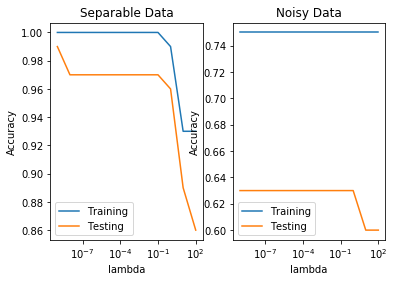

Red markers indicate incorrect predictions


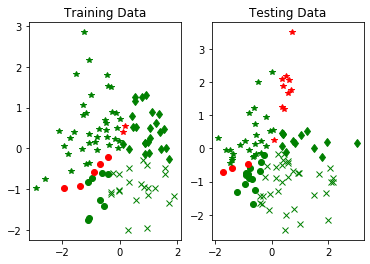

In [44]:
# Plot results of logistic regression parameter sweep

plt.subplot(121)
train_line = plt.semilogx(lambda_vals, train_accuracy[False], label="Training")
test_line = plt.semilogx(lambda_vals, test_accuracy[False], label="Testing")
plt.title('Separable Data')
plt.xlabel('lambda')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(122)
train_line = plt.semilogx(lambda_vals, train_accuracy[True], label="Training")
test_line = plt.semilogx(lambda_vals, test_accuracy[True], label="Testing")
plt.title('Noisy Data')
plt.xlabel('lambda')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# plot clean predictions

test_predictions = linear_predict(test_data, model[False])
train_predictions = linear_predict(train_data, model[False])

plt.subplot(121)
plot_predictions(train_data, train_labels[False], train_predictions)
plt.title('Training Data')
plt.subplot(122)
plot_predictions(test_data, test_labels[False], test_predictions)
plt.title('Testing Data')

print("Red markers indicate incorrect predictions")

plt.show()